[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  1. ...,  1.  1.  0.]
 [ 0.  1.  1. ...,  1.  1.  0.]
 ..., 
 [ 0.  1.  1. ...,  1.  1.  0.]
 [ 0.  1.  1. ...,  1.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


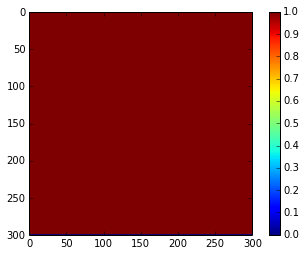

In [73]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#Crea la grid
N=200 #cantidad de puntos espaciales
xp=np.linspace(-15 ,15 ,N)
yp=np.linspace(-15 ,15 ,N)
dx=abs(xp[1]-xp[0])
dy=abs(yp[1]-yp[0])


c=1.0 #velocidad de propagacion
dt= 0.5*(dx/c) #unidad de tiempo con condiciones de estabilidad
time=int(60/dt) #cantidad de puntos de tiempo necesarios para que t=60 -->time=60/dt
#como dx=dy se puede definir un gamma
gamma=(c*dt/dx) 

#CONDICIONES INICIALES
#La perturbacion inicial queda en 1/3 de un lado y comienza con 0.5, hay una barrera a 1/3 del lado opuesto con un hueco
#en los bordes y la barrera el potencial siempre es 0 y en t=0 u es 0 en todas partes menos en la perturbacion
#La solucion u va a depender de t,x
#velocidad en t=0 es 0

u0=np.zeros((N,N)) #array sin inicializar
u0[N/3-1,N/2]= -0.5 #preturbacion inicial

#crea las condiciones de frontera
frontier=np.zeros((N,N))
frontier[1:N-1,1:N-1]=1
frontier[N*(2/3)-1,N/2-2:N/+2]=1
frontier[299,:N/2-10]=0
frontier[299,N/2+10:]=0
frontier[N-1,:]=0

#fotogramas
foto=[]
foto.append(u0)


#Crea u1 usando la condición inicial sobre la derivada en t=0
u1=np.zeros((N,N))
for j in range(1, len(xp)-1): #j corresponde a y
    for k in range(1, len(yp)-1):
        u1[j,k]= 0.5*(gamma**2)*(u0[j+1,k]-2*u0[j,k]+u0[j-1,k] + \
                u0[j,k+1]-2*u0[j,k]+u0[j,k-1])+ u0[j,k]
plt.imshow(frontier)
plt.colorbar()
print frontier

In [71]:
def calculate_row(past_row, present_row, up, down):
    #past_row es la fila j de la anterio matriz
    #present_row es las fila j de la matriz actual
    #up es la fila j-1 de present y down es la fila j+1 de present
    pre_r= np.roll(np.copy(present_row),1) #equivalente a k+1, mueve las columnas
    pre_l= np.roll(np.copy(present_row),-1) #equivalente a k-1, mueve las columnas
    pre_r[0]=0
    pre_r[N-1]=0
    pre_l[0]=0
    pre_l[N-1]=0
    
    future_row=(2-4*gamma**2)*present_row + (gamma**2)*(down+up+pre_r+pre_l) - past_row
    return future_row


#evolucion temporal
def solve2(): 
    #calcula la solucion despues de cierto intervalo de tiempo con barrera
    u=np.zeros((N,N))
    past=np.copy(u0) #i-1
    present=np.copy(u1) #i
    #crea la barrera
    bar=np.zeros(N)
    counter=0 #cuenta las iteraciones para tomar fotogramas
    for i in range(0,time):
        for j in range(2, len(xp)-2): 
            bar[N/2-20:N/2+20]=present[199, N/2-20:N/2+20] #actualiza bar
            if(j==198): #pregunta si esta arriba de la barrera (2/3)*300-2
                #envia bar como la siguiente fila
                u[j,:]=calculate_row(past[j,:], present[j,:], present[j-1,:], bar)
   
                
            if(j==199): #pregunta si esta sobre la barrera
                #envia bar como la fila actual
                u[j,:]=calculate_row(past[j,:], bar, present[j-1,:], present[j+1])
                
                    
            if(j==200):
                u[j,:]=calculate_row(past[j,:], present[j,:], bar, present[j+1,:])
                      
            else:
                u[j,:]=calculate_row(past[j,:], present[j,:], present[j-1,:], present[j+1,:])
                
        if(counter==100):
            print "count"
            foto.append(present)
            counter=0
        
        past=np.copy(present)      
        present=np.copy(u)
        counter=counter+1
        
              
    return u

def calculaterow1(past_row, present_row, up, down):
    #past_row es la fila j de la anterio matriz
    #present_row es las fila j de la matriz actual
    #up es la fila j-1 de present y down es la fila j+1 de present
    pre_r= np.roll(np.copy(present_row),1) #equivalente a k+1, mueve las columnas
    pre_l= np.roll(np.copy(present_row),-1) #equivalente a k-1, mueve las columnas   
    future_row=(2-4*gamma**2)*present_row + (gamma**2)*(down+up+pre_r+pre_l) - past_row
    return future_row

def solve1(): 
    #calcula la solucion despues de cierto intervalo de tiempo con barrera
    u=np.zeros((N,N))
    past=np.copy(u0) #i-1
    present=np.copy(u1) #i
    for i in range(0,time/2):
        for j in range(1, len(xp)-1): 
            u[j,:]=calculaterow1(past[j,:], present[j,:], present[j-1,:], present[j+1,:])
        
        past=np.copy(present)   
        u=u*frontier
        present=np.copy(u)
        
    return u




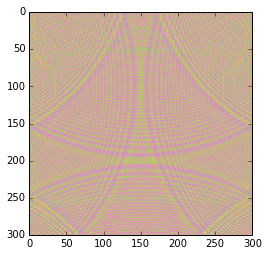

In [74]:
solution1 = solve1()
plt.imshow(solution1, cmap='Set2')



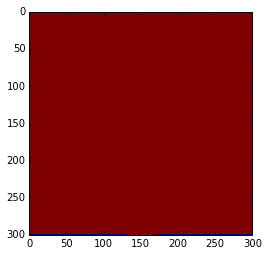

In [29]:
plt.imshow(barr)
#plt.imshow(solution2 , cmap= 'Set2')

#fig= plt.figure()
#im = plt.imshow( u0,cmap='Set1', animated ='True')
#def init():
 #   im.set_data(u0)
 #   return [im]
#def animate(i):
#    im=plt.imshow(foto[i])
#    return [im]

#anim= animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=10, blit=False)




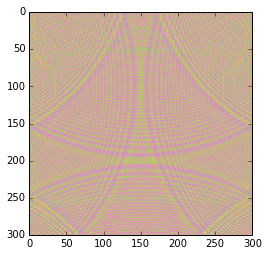